# Text Analysis With Python 

This workshop covers a number of text analysis techniques using Python. It assumes you You are welcome to follow along in the IDE of your choice, but the instructors will be using Jupyter Lab.

## Be sure you have the following packages installed
- **pandas**
- **sklearn**
- **seaborn**

Additionally, we will be using **os and re**

## Python Packages often used for Text Analysis - Rolando
- Directly related to Text Analysis
    - NLTK
    - spaCy
    - Textblob
    - Gensim
    - Transformers

- Useful tools for text analysis
    - Pandas
    - Scikit-Learn
    - Matplotlib


## Mini-project 1: Word Frequencies (1:05) - Rolando

#### Data: [Jane Eyre - Charlotte Brontë](https://www.gutenberg.org/files/1260/1260-h/1260-h.htm)
#### Tools: NLTK, Scitkit-learn, Pandas
#### Method: Simple N-grams (Document vs Chapters), Maybe TF-IDF, 

##### 1. Load in data

In [1]:
import os 

chapter_texts = []
chs_dir = './datasets/jane_eyre_bronte/'
for ch in os.listdir(chs_dir):
    ch_path = os.path.join(chs_dir, ch)
    with open(ch_path, 'r') as f:
        f.readline() # reading through the first line
        txt = f.readlines()
        chapter_texts.append(txt)

In [2]:
# the first ten lines from the first chapter
chapter_texts[0][:10]

['\n',
 '\n',
 'There was no possibility of taking a walk that day. We had been\n',
 'wandering, indeed, in the leafless shrubbery an hour in the morning;\n',
 'but since dinner (Mrs. Reed, when there was no company, dined early)\n',
 'the cold winter wind had brought with it clouds so sombre, and a rain\n',
 'so penetrating, that further outdoor exercise was now out of the\n',
 'question.\n',
 '\n',
 'I was glad of it: I never liked long walks, especially on chilly\n']

##### 2. Preprocessing

Most text analysis projects require a number of steps to **preprocess** the text. Usually, this involves removing undesired characters such as punctuation and line breaks. Below, we use [**regular expressions**](https://docs.python.org/3/library/re.html) to achieve this task. 

In [3]:
import re

# join the lines together first with nested list comprehensions
joined_chs = [''.join([line for line in ch if line != '\n']) for ch in chapter_texts]

# replace break lines (\n) with spaces
no_bl_chs = [re.sub(r'\n', ' ', ch) for ch in joined_chs]

# remove punctuation
no_punct_chs = [re.sub(r'[:;.,_“”\']', '', ch) for ch in no_bl_chs]

#### 3. Vectorize Text
Now we can count the number of times each word appears and create a vector of words along with their frequencies. This is done using Scikit-learn's [Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

Notice the CountVectorizer allows the use of stop words. Stop words are extremely common words that often appear in most texts, such as "a, and, the". These words aren't usually very informative. Sklearn provides standardized lists of stopwords available in different languages.

In [4]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

stopwords = set(stopwords.words('english'))

# demonstrating some of the parameters within Count Vectorizer
vc = CountVectorizer(lowercase=True, 
                     stop_words=stopwords,
                     ngram_range=(1,1),
                     max_df=0.9,
                     min_df=0.1)

vectors = vc.fit_transform(no_punct_chs)


Below, we can see the output of the CountVectorizer and the frequency of different words used in the text.

In [5]:
print(vc.vocabulary_)

{'possibility': 2325, 'taking': 3124, 'walk': 3397, 'wandering': 3406, 'indeed': 1602, 'shrubbery': 2818, 'since': 2844, 'dinner': 840, 'mrs': 2030, 'reed': 2504, 'company': 583, 'dined': 838, 'early': 951, 'cold': 554, 'winter': 3487, 'wind': 3482, 'brought': 392, 'clouds': 544, 'sombre': 2905, 'rain': 2453, 'penetrating': 2234, 'exercise': 1081, 'question': 2437, 'glad': 1365, 'liked': 1809, 'walks': 3400, 'especially': 1042, 'chilly': 504, 'dreadful': 911, 'coming': 567, 'home': 1523, 'raw': 2468, 'twilight': 3286, 'fingers': 1204, 'bessie': 292, 'nurse': 2106, 'consciousness': 621, 'physical': 2265, 'eliza': 989, 'john': 1696, 'georgiana': 1347, 'clustered': 546, 'round': 2654, 'mama': 1887, 'drawing': 907, 'lay': 1766, 'sofa': 2893, 'fireside': 1209, 'neither': 2070, 'quarrelling': 2433, 'perfectly': 2240, 'happy': 1461, 'group': 1429, 'saying': 2690, 'regretted': 2520, 'necessity': 2061, 'keeping': 1710, 'distance': 871, 'discover': 853, 'observation': 2118, 'earnest': 953, 'disp

In [6]:
word_vect_df = pd.DataFrame(data=vectors.toarray(), columns=vc.get_feature_names_out())
word_vect_df.sample(10)

,abandoned,abbot,abhor,able,abode,abrupt,abruptly,absence,absent,absolute,...,yellow,yesterday,yield,yielded,yielding,yonder,young,younger,youth,zeal
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,1
27,0,0,1,2,0,0,0,0,0,0,...,0,0,3,0,0,1,1,1,4,0
16,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,4,1,1,0
17,0,0,0,1,0,1,1,1,1,0,...,0,0,0,0,0,0,5,0,0,0
4,0,0,0,2,2,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
23,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,2,4,0,0,0
29,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
25,0,0,0,0,0,0,0,1,1,0,...,0,3,0,0,0,1,1,0,0,0
19,0,0,0,2,0,0,0,0,0,0,...,0,0,0,1,1,2,1,0,0,0


In [7]:
word_vect_df.sum(axis=0).sort_values(ascending=False).head(20)

rochester    366
jane         346
sir          316
miss         310
mrs          252
night        223
john         202
door         182
love         153
make         152
way          150
without      149
away         149
man          146
went         144
cannot       139
st           137
fairfax      137
head         136
back         135
dtype: int64

Many of the words with the highest frequencies are part of characters' names, which we expect to show up a lot more. These don't necessarily give us a lot of information however, but we can check how 'informative' these terms are by finding their TFIDF scores using sklearn's [TFIDF Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [8]:
tc = TfidfVectorizer(lowercase=True, 
                     stop_words=stopwords,
                     ngram_range=(1,1),
                     max_df=0.9,
                     min_df=0.1)

tc_vectors = tc.fit_transform(no_punct_chs)


tfidf_vect_df = pd.DataFrame(data=tc_vectors.toarray(), columns=tc.get_feature_names_out())
tfidf_vect_df.sample(10)

,abandoned,abbot,abhor,able,abode,abrupt,abruptly,absence,absent,absolute,...,yellow,yesterday,yield,yielded,yielding,yonder,young,younger,youth,zeal
2,0.000000,0.223885,0.0,0.015934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.021395,0.000000,0.000000,0.0,0.000000,0.031508,0.000000,0.000000,0.000000
33,0.000000,0.000000,0.0,0.000000,0.013861,0.000000,0.000000,0.000000,0.025182,0.014640,...,0.015561,0.012591,0.000000,0.000000,0.0,0.010733,0.006181,0.000000,0.000000,0.000000
9,0.020869,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.019188,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.061467,0.000000,0.000000,0.025792
12,0.000000,0.000000,0.0,0.016135,0.000000,0.022689,0.023851,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.019920,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
35,0.000000,0.000000,0.0,0.018014,0.000000,0.000000,0.000000,0.022240,0.024188,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.011874,0.000000,0.000000,0.000000
11,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050519,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.021329,0.000000,0.059925,0.000000
29,0.023951,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.022022,0.000000,0.000000,...,0.000000,0.000000,0.022022,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.029602
14,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.044757,0.025775,0.000000,0.024139,0.000000
3,0.015332,0.017827,0.0,0.000000,0.000000,0.016056,0.016878,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.017827,0.0,0.000000,0.030105,0.030663,0.000000,0.000000
20,0.000000,0.014353,0.0,0.000000,0.000000,0.012928,0.000000,0.011350,0.012345,0.000000,...,0.015257,0.049379,0.000000,0.000000,0.0,0.000000,0.030300,0.012345,0.000000,0.000000


In [9]:
tfidf_vect_df.mean(axis=0).sort_values(ascending=False).head(20)

rochester     0.098255
sir           0.083484
jane          0.076760
miss          0.071965
mrs           0.063024
bessie        0.061775
john          0.053590
night         0.049863
st            0.049849
reed          0.045836
adèle         0.044635
fairfax       0.042135
helen         0.040965
door          0.038572
love          0.035887
diana         0.035241
ingram        0.034521
mary          0.034106
thornfield    0.033536
eyre          0.033109
dtype: float64

## Mini-project 2: Classification (1:15) - Lorin

#### Data: [On the Books Laws](https://cdr.lib.unc.edu/collections/f4752p47h?locale=en)
#### Tools: Scitkit-learn, Pandas, 
#### Methods: Supervised (Jim Crow vs. Non-Jim Crow) vs Unsupervised (Topic-modeling)
#### Helpful: [Comparing classifiers](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)


Classification allows us to separate documents into different groups depending on the language used in the text. Often, classification uses machine learning techniques. Two common types of machine learning are **supervised and unsupervised**.

### About the Data

This data comes from [On the Books: Jim Crow and Algorithms of Resistance](https://onthebooks.lib.unc.edu/), a text analysis project that discovered Jim Crow and racially-based legislation signed into law in North Carolina between 1866 and 1967. It uses supervised and unsupervised classification techniques to identify laws with race-based language and the type of legislation covered by those laws.

### Supervised Classification

### Create Testing & Training Sets

Bring in labeled training set

In [10]:
import pandas as pd

df = pd.read_csv("datasets/otb_training_set.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      1785 non-null   object
 1   source                  1785 non-null   object
 2   jim_crow                1785 non-null   int64 
 3   chapter_num             1785 non-null   int64 
 4   section_num             1785 non-null   int64 
 5   chapter_text            1785 non-null   object
 6   section_text            1785 non-null   object
 7   year                    1785 non-null   int64 
 8   type_private laws       1785 non-null   int64 
 9   type_public laws        1785 non-null   int64 
 10  type_public local laws  1785 non-null   int64 
 11  type_session laws       1785 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 167.5+ KB


Includes 512 examples of Jim Crow laws and 1273 non Jim Crow laws.

In [11]:
df.jim_crow.value_counts()

0    1273
1     512
Name: jim_crow, dtype: int64

Laws were labeled as Jim Crow or Not Jim Crow according to scholarly works (Pauli Murray, Richard Paschal) and experts at UNC (William Sturkey, among others)

In [12]:
df.source.value_counts()

project experts    1673
paschal              74
murray               38
Name: source, dtype: int64

We need to pick a target for our classification, aka the "output".

In [13]:
target = df["jim_crow"]

What features do we want to train the models on? They will be our "inputs".

In [14]:
features = df.loc[:, "section_text" : "type_session laws"]
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   section_text            1785 non-null   object
 1   year                    1785 non-null   int64 
 2   type_private laws       1785 non-null   int64 
 3   type_public laws        1785 non-null   int64 
 4   type_public local laws  1785 non-null   int64 
 5   type_session laws       1785 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 83.8+ KB


Use train-test-split to separate data into training and testing sets. 80% will be training, 20% will be testing - set by test_size = 0.2.  Data is chosen for the different sets at random, so random_state allows us all to get the same results. X_train and X_test include the inputs. y_train and y_test include the output.

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 25)

### Vectorize the text

As above, we need to find word frequencies

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(decode_error = "ignore", min_df = 2, max_df = 1000)

In this case, we've chosen to ingore errors when it comes to characters with the wrong encoding. Additionally, we are not including any words that are too rarely used in the text (less than two times) or too often used (more than 1000 times).

Below, the vectorization is applied.

In [30]:
X_train = vec.fit_transform(X_train.section_text)
X_test = vec.transform(X_test.section_text)

Now we need to decide on a machine learning classification model. In this case, we are using multinomial Naive Bayes which comes with sklearn.

In [32]:
from sklearn.naive_bayes import MultinomialNB


nb = MultinomialNB()
nb.fit(X_train, y_train)



MultinomialNB()

Now that we've trained the model on our data, let's use it on the testing set and see how well it did.

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

preds = nb.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.86      0.92       265
           1       0.70      0.93      0.80        92

    accuracy                           0.88       357
   macro avg       0.84      0.90      0.86       357
weighted avg       0.91      0.88      0.89       357



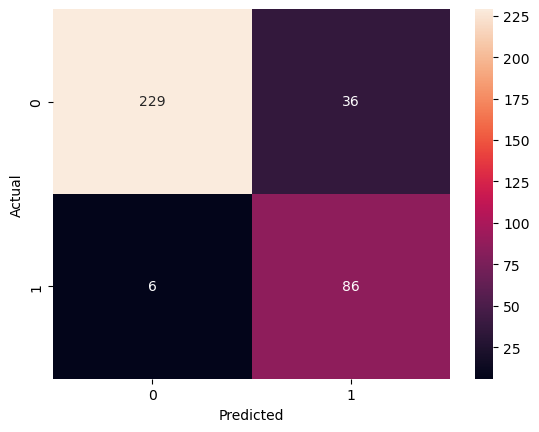

In [37]:
import seaborn as sns

# count the number of labels
labels = np.unique(preds)

data = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

# use sns.heatmap on top of confusion_matrix to show the confusion matrix
ax = sns.heatmap(df_cm,xticklabels=True, annot=True, fmt='.0f')

We remove stopwords, tokenize the text, lemmatize

## Mini-project 3: Sentiment Analysis (1:35) - Rolando

#### Data: [Chaptgpt Sentiment Analysis](https://www.kaggle.com/datasets/charunisa/chatgpt-sentiment-analysis)
#### Tools: Textblob, NLTK, spaCy, Transformers
#### Methods: Dictionary (+ rule-based) vs. Transformer-based approach